# ARIMA Model

`Autoregressive integrated moving average (ARIMA) models predict future values based on past values. ARIMA makes use of lagged moving averages to smooth time series data. They are widely used in technical analysis to forecast future security prices.` Investopedia

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname('../'), 'src'))

from model_training import ARIMAModel

modelling = ARIMAModel()

In [2]:
# Load the data
stoke_data=modelling.load_dataset('../data/raw/stoke_data.csv')

In [3]:
stoke_data.head()

,TSLA,BND,SPY
Date,,,
2015-01-02,14.620667,82.650002,205.429993
2015-01-05,14.006000,82.889999,201.720001
2015-01-06,14.085333,83.129997,199.820007
2015-01-07,14.063333,83.180000,202.309998
2015-01-08,14.041333,83.050003,205.899994


# **Build a time series forecasting model to predict Tesla's future stock prices.**

Our dataset is pretty clean, but in other contexts, we would have to handle indexing issues, which is important in time series forecasting. our next task is checking for stationary.

## Check for stationary

Keeping things stationary makes the modeling task a lot easier, helps to improve our model accuracy and in return provides us with more reliable predictions. While ARIMA models can deal with non-stationarity up to a point, they cannot effectively account for time-varying variance. Here we can use the `Augmented Dickey-Fuller` test to tell us if our data has a constant mean and variance.

In [4]:
modelling.assess_stationarity(stoke_data, 'TSLA')

2024-11-13 15:25:17,316 - INFO - Checked time series stationarity status.


ADF Test Statistic: -1.1507672706146075
p-Value: 0.694408065768529
Lag Used: 27
Observations Used: 2446
Critical Values: {'1%': np.float64(-3.433026277967909), '5%': np.float64(-2.862722353917318), '10%': np.float64(-2.56739941472018)}
Stationarity Conclusion: Non-Stationary


So from the above Augmented Dickey-Fuller test our dataset is not stationary.
## Train Test Split

In [5]:
train_data, test_data = modelling.split_train_test(stoke_data, 'TSLA')

2024-11-13 15:25:17,361 - INFO - Split dataset into training and testing sets (80/20 ratio).


## Model identification
When we build an ARIMA model, we have to consider the p, d, and q terms that go into our ARIMA model. 

- **p (autoregressive order):** This parameter represents the number of lagged observations to include in the model. It helps us capture dependencies on past values by examining the autocorrelation of the time series at various lags.

- **d (differencing order):** This parameter indicates the number of differencing steps needed to make the series stationary, meaning it removes trends and seasonality. By differencing the data, we ensure it’s stable over time.

- **q (moving average order):** This represents the number of lagged forecast errors to include. Unlike a typical moving average, this captures relationships between observations and residual errors from a model applied to previous observations.

So here to determine the best parameters we will use our `optimize_arima_order` module.

In [6]:
best_params=modelling.optimize_arima_order(train_data)

2024-11-13 15:31:02,639 - INFO - Performed grid search to identify the optimal ARIMA parameters.


Optimal ARIMA parameters found: (2, 1, 3)


ALright, now it time to train our model since we differenciate the best parameters (2, 1, 3) for the model 

## Trian the model with ARIMA

In [7]:
model = modelling.fit_arima_model(train_data, test_data, best_params, 'TSLA')

2024-11-13 15:31:09,901 - INFO - Trained ARIMA model and saved both model and scaler.


## Evaluate model statistics

In [8]:
modelling.evaluate_model_performance(test_data, model)

2024-11-13 15:31:09,938 - INFO - Calculated evaluation metrics for model performance.


Evaluation Metrics:
MAE: 38.679237042432206
MSE: 2386.409614096125
RMSE: 48.85089164074823
R2 Score: -0.6007220025944171
MAPE: 17.526002500197674%


The evaluation metrics for the ARIMA model indicate the following performance:

- `MAE (Mean Absolute Error)`: 38.71, which shows the average absolute difference between the predicted and actual values.
- `MSE (Mean Squared Error):` 2389.61, reflecting the average squared difference, penalizing larger errors.
- `RMSE (Root Mean Squared Error):` 48.88, providing an estimate of the model's typical error in the same units as the data.
- `R2 Score:` -0.60, suggesting that the model does not fit the data well, as this negative value indicates poor predictive power.
- `MAPE (Mean Absolute Percentage Error): `17.54%, showing an average prediction error of approximately 17.54% relative to actual values.

Overall, the ARIMA model’s performance could likely be improved, as indicated by the negative R2 score and relatively high error metrics.

## Visualize our time series

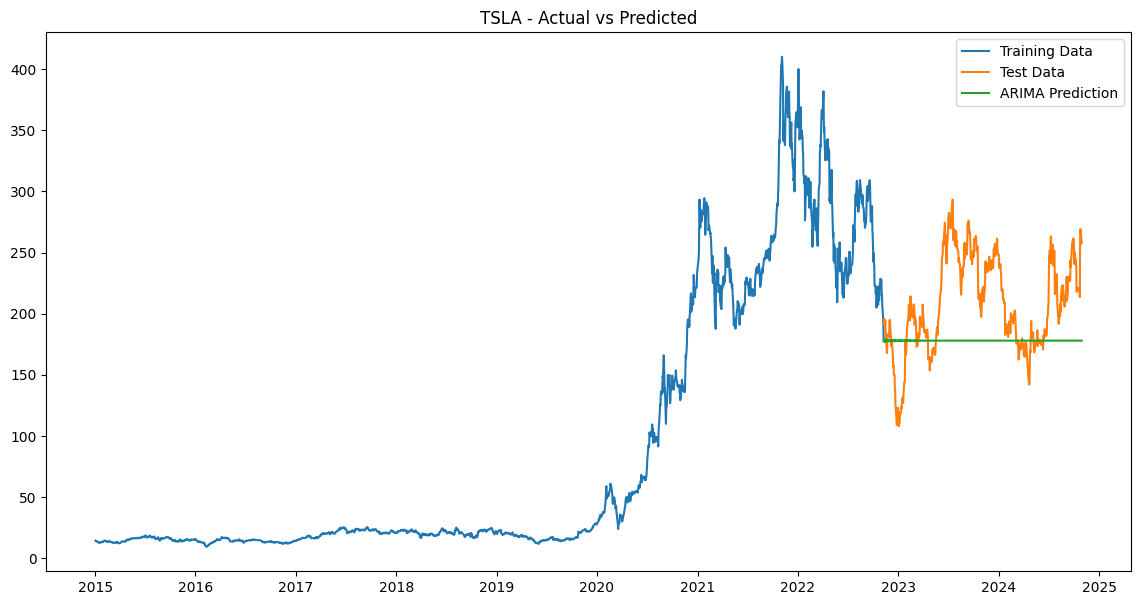

2024-11-13 15:31:11,344 - INFO - Displayed forecast comparison plot.


In [9]:
modelling.display_forecast_results('TSLA', train_data, test_data, model)

The ARIMA model struggles to capture the volatility and trends in TSLA's test data, resulting in flat predictions that don't align well with actual movements.

# **Build a time series forecasting model to predict Vanguard Total Bond Market ETF's (BND) future stock prices.**

In [10]:
modelling.assess_stationarity(stoke_data, 'BND')

2024-11-13 15:31:14,648 - INFO - Checked time series stationarity status.


ADF Test Statistic: -0.8164742995385416
p-Value: 0.8142349053641819
Lag Used: 13
Observations Used: 2460
Critical Values: {'1%': np.float64(-3.4330110311801567), '5%': np.float64(-2.862715621038473), '10%': np.float64(-2.5673958300284223)}
Stationarity Conclusion: Non-Stationary


In [11]:
bnd_train_data, bnd_test_data = modelling.split_train_test(stoke_data, 'BND')


2024-11-13 15:31:14,777 - INFO - Split dataset into training and testing sets (80/20 ratio).


In [12]:
bnd_best_params=modelling.optimize_arima_order(bnd_train_data)


2024-11-13 15:37:56,385 - INFO - Performed grid search to identify the optimal ARIMA parameters.


Optimal ARIMA parameters found: (4, 1, 4)


In [13]:
model_bnd = modelling.fit_arima_model(bnd_train_data, bnd_test_data, bnd_best_params, 'BND')

2024-11-13 15:38:12,784 - INFO - Trained ARIMA model and saved both model and scaler.


In [14]:
modelling.evaluate_model_performance(bnd_test_data, model_bnd)


2024-11-13 15:38:13,025 - INFO - Calculated evaluation metrics for model performance.


Evaluation Metrics:
MAE: 2.5792947952684857
MSE: 8.172218715425446
RMSE: 2.8587092743798634
R2 Score: -2.8297273743012097
MAPE: 3.5292098865037107%


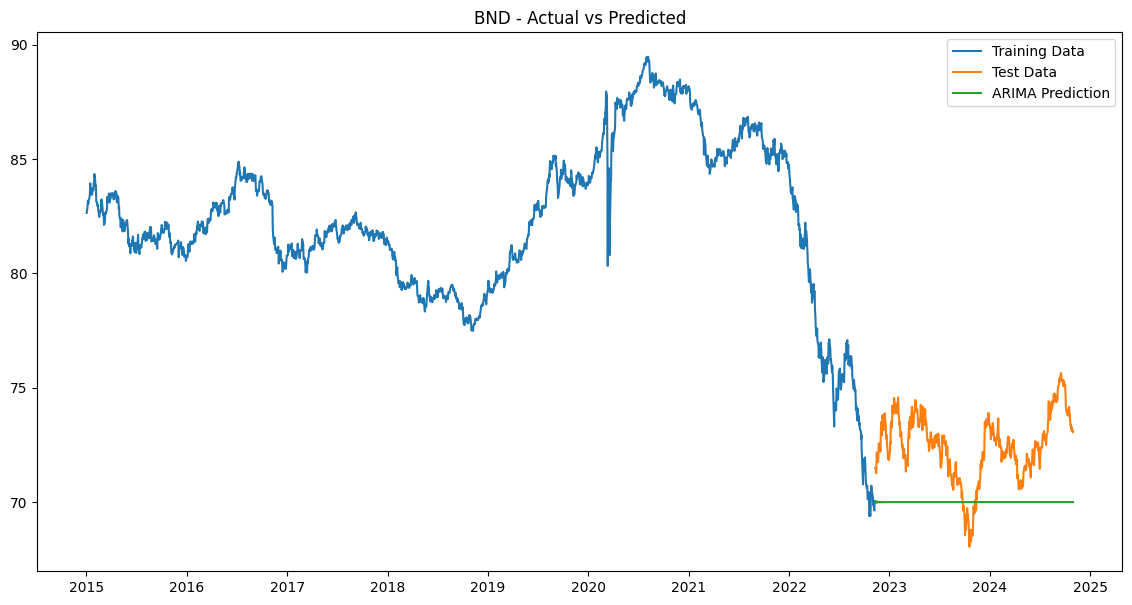

2024-11-13 15:38:13,955 - INFO - Displayed forecast comparison plot.


In [15]:
modelling.display_forecast_results('BND', bnd_train_data, bnd_test_data, model_bnd)


# **Build a time series forecasting model to predict S&P 500 ETF's (SPY) future stock prices.**

In [16]:
modelling.assess_stationarity(stoke_data, 'SPY')

2024-11-13 15:38:17,170 - INFO - Checked time series stationarity status.


ADF Test Statistic: 0.7298432272822017
p-Value: 0.9904150070128018
Lag Used: 27
Observations Used: 2446
Critical Values: {'1%': np.float64(-3.433026277967909), '5%': np.float64(-2.862722353917318), '10%': np.float64(-2.56739941472018)}
Stationarity Conclusion: Non-Stationary


In [17]:
SPY_train_data, SPY_test_data = modelling.split_train_test(stoke_data, 'SPY')
SPY_best_params=modelling.optimize_arima_order(SPY_train_data)


2024-11-13 15:38:17,336 - INFO - Split dataset into training and testing sets (80/20 ratio).
2024-11-13 15:44:53,550 - INFO - Performed grid search to identify the optimal ARIMA parameters.


Optimal ARIMA parameters found: (4, 1, 4)


In [18]:
model_SPY = modelling.fit_arima_model(SPY_train_data, SPY_test_data, SPY_best_params, 'SPY')


2024-11-13 15:45:00,172 - INFO - Trained ARIMA model and saved both model and scaler.


In [19]:
modelling.evaluate_model_performance(SPY_test_data, model_SPY)


2024-11-13 15:45:00,197 - INFO - Calculated evaluation metrics for model performance.


Evaluation Metrics:
MAE: 94.30252776715714
MSE: 12442.313129619602
RMSE: 111.54511701378776
R2 Score: -2.505865288806114
MAPE: 18.845890978032777%


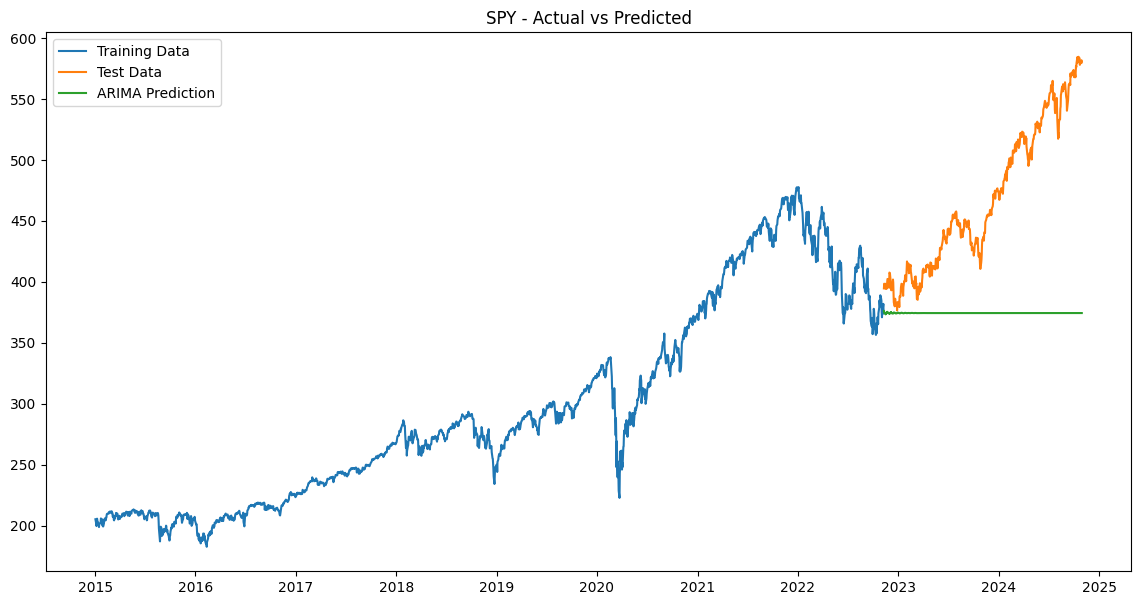

2024-11-13 15:45:00,882 - INFO - Displayed forecast comparison plot.


In [20]:
modelling.display_forecast_results('SPY', SPY_train_data, SPY_test_data, model_SPY)